# Particle filter for a uniformly expanding map #

### Jochen Broecker, University of Reading, 2025 ###
### Prepared for the NCEO Data Assimilation Course ###
Published under BSD License 2.0

We consider the following stochastic dynamical system
$$ x_{n+1} = (2 x_n + \rho r_{n+1}) \mod 1 $$ 
for $n = 0, 1, 2, \ldots$. Here

- $\{x_n\}_{n \in \mathbb N}$ live on the unit interval $[0, 1]$
- $\{r_n\}_{n \in \mathbb N}$ are standard normal random variables (``dynamical noise'')
- $\rho > 0$ sets the strength of dynamical noise
- ``$\mod 1$'' means modulo~1, so this should be seen as a system on the unit circle.

The system is nonlinear (due to mod) and highly chaotic (due to expansion factor 2).

As observations we use $y_n = \cos(2 \pi x_n) + \sigma s_n$, where

- $\{s_n\}_{n \in \mathbb N}$ are standard normal random variables (``observational noise'')
- $\sigma > 0$ sets the strength of the observational noise
- observations $\{y_n\}_{n \in \mathbb N}$ live on the entire real line


# How the particle filter works #

At time $n$, let $X_n^{(1)}, \ldots, X_n^{(K)}$ the ensemble members with corresponding weights $w_n^{(1)}, \ldots, w_n^{(K)}$.

## Prediction step ##

For each $k = 1, \ldots, K$ we randomly select the number $l_k$ of ``offspring'' of the ensemble member $X_n^{(k)}$. Broadly speaking, the number of offspring of ensemble member $X_n^{(k)}$ will be $\cong w_n^{(k)} K$. More specifically, the random numbers $l_1, \ldots, l_K$ have joint multinomial distribution with probabilities $w_n^{(1)}, \ldots, w_n^{(K)}$. The offspring of ensemble member $X_n^{(k)}$ is generated by running

$$ X_{n,+}^{(j)} = (2 X_n^{(k)} + \rho r_{j}) \mod 1$$

for $j = 1, \ldots, l_k$. The offspring from all ensemble members are collated into the new ensemble $ X_{n+1}^{(1)}, \ldots,  X_{n+1}^{(K)}$.

## Update step ##

This consists of computing a new weight $w_{n+1}^{(k)}$ for each ensemble member $X_{n+1}^{(k)}$ according to 

$$w_{n+1}^{(k)} = c_{n+1} \cdot g(y_{n+1} - \sin(X_{n+1}^{(k)}))$$

where $y_{n+1}$ is the true observation and $g$ is the Gaussian density with standard deviation $\sigma$. Furthermore $c_{n+1}$ is a normalisation constant.


In [1]:
# imports to python
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.ion()
import particlefilter as ptcl
from IPython.display import clear_output

In [2]:
# Setting up parameters
std_dyn = 0.01 # dynamical noise
std_obs = 0.1 # observational noise
N_max = 10000 # max number of iterations
K = 200 # number of particles (i.e. ensemble size)
ens = np.random.uniform(size = (K, 1)) # initialise ensemble uniformly on circle
wgt = np.random.uniform(size = (K, 1)) # initialise uniform weights
wgt = wgt / np.sum(wgt) # normalise weights

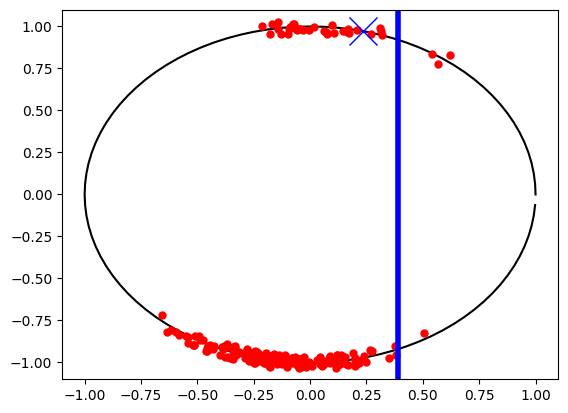

In [ ]:
x = 0.5 # True initial condition
t = np.arange(0, 1, 0.01) # to draw the circle
jitter = 0.96 + 0.08 * np.random.uniform(size = ens.shape) # to visualise ensemble
fig = plt.figure()
for n in range(1, N_max):
    clear_output(wait=True)
    axes = plt.gca()
    axes.set_xlim([-1.1, 1.1])
    axes.set_ylim([-1.1, 1.1])
    
    x = np.mod((2 * x + std_dyn * np.random.normal()), 1) # compute next state of true dynamics
    y = np.cos(2 * np.pi * x) + std_obs * np.random.normal() # compute observation
    
    ens = ptcl.prediction(ens, wgt, std_dyn) # prediction step
    wgt = ptcl.update(y, ens, std_obs) # update step
    
    plt.plot(np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 'k') # plot circle
    plt.plot(jitter * np.cos(2 * np.pi * ens), jitter * np.sin(2 * np.pi * ens), 'r.', markersize = 10) # plot ensemble
    plt.plot(np.cos(2 * np.pi * x), np.sin(2 * np.pi * x), 'bx', markersize = 20) # plot location of current true system state
    plt.plot([y, y], [-1.1, 1.1], 'b', linewidth = 4) # plot line indicating current observation

    plt.pause(1) 
